## Importing Important Libraries

In [1]:
import tweepy,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

## Authentication from Tweeter API

In [2]:
API_Key= 'CfO3IXaHuvtzOAIxIPBA4TpMS'
API_Secret_Key ='auQ0vHPZwUj7jqaKEoiSyObEArqvtXKfOX9uX6IZaB2UwtSm8H'
Access_Token ='1396163282520600576-ArrbTFVjC8eres9NYJqokPvTo1Q5nO'
Access_Token_Secret ='ASKryk99corDEsJXZpGgJyDdwf1rTcfIESQ1V1wTGE8iy'
auth = tweepy.OAuthHandler(API_Key, API_Secret_Key)
auth.set_access_token(Access_Token, Access_Token_Secret)
#api= tweepy.API(auth)
api =tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
#api = tweepy.API(auth, wait_on_rate_limit=True)



### Take input for searched  them and how many tweets to search

In [3]:
searchterm = input("Enter Keyword/Tag to search About:")
No_of_Terms = int(input("Enter how many tweets to search:"))

tweets =[]
tweetText = []

#Searching for tweets

tweets = tweepy.Cursor(api.search, q= searchterm+" -filter:retweets", lang="en").items(No_of_Terms)

Enter Keyword/Tag to search About:Narendra Modi
Enter how many tweets to search:2000


### Data Scraping from Tweets

In [4]:
tweet_list = [tweet.text for tweet in tweets]
tweet_df =pd.DataFrame(tweet_list)
tweet_df

,0
0,#वादा_निभाओ_शिक्षामित्र_बचाओ\n#वादा_निभाओ_शिक्...
1,I received Birthday Greetings From Hon’ble Pri...
2,Prime Minister Narendra Modi made a strong ple...
3,The worst leaders in the past 20 years would b...
4,"The Prime Minister of India, who proud himself..."
...,...
1995,For the first time since Narendra Modi and Ami...
1996,PM condoles loss of lives due to collapse of a...
1997,CM Yogi Adityanath meets PM Narendra Modi amid...
1998,"Recently, however, former Union Minister and c..."


### Data Cleaning

In [5]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)"," ",text).split())
tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [6]:
tweet_df

,0,cleaned_data
0,#वादा_निभाओ_शिक्षामित्र_बचाओ\n#वादा_निभाओ_शिक्...,Respected Cm yogi ji and pm Shri Narendra Modi...
1,I received Birthday Greetings From Hon’ble Pri...,I received Birthday Greetings From Hon ble Pri...
2,Prime Minister Narendra Modi made a strong ple...,Prime Minister Narendra Modi made a strong ple...
3,The worst leaders in the past 20 years would b...,The worst leaders in the past 20 years would b...
4,"The Prime Minister of India, who proud himself...",The Prime Minister of India who proud himself ...
...,...,...
1995,For the first time since Narendra Modi and Ami...,For the first time since Narendra Modi and Ami...
1996,PM condoles loss of lives due to collapse of a...,PM condoles loss of lives due to collapse of a...
1997,CM Yogi Adityanath meets PM Narendra Modi amid...,CM Yogi Adityanath meets PM Narendra Modi amid...
1998,"Recently, however, former Union Minister and c...",Recently however former Union Minister and cur...


In [7]:
def drop_number(list_text):
    list_text_new =[]
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_number)

In [8]:
tweet_df.head()

,0,cleaned_data
0,#वादा_निभाओ_शिक्षामित्र_बचाओ\n#वादा_निभाओ_शिक्...,Respected Cm yogi ji and pm Shri Narendra Modi...
1,I received Birthday Greetings From Hon’ble Pri...,I received Birthday Greetings From Hon ble Pri...
2,Prime Minister Narendra Modi made a strong ple...,Prime Minister Narendra Modi made a strong ple...
3,The worst leaders in the past 20 years would b...,The worst leaders in the past years would be ...
4,"The Prime Minister of India, who proud himself...",The Prime Minister of India who proud himself ...


### Convert all tweets in lowercase

In [9]:
#changing all the words of the review colloumn to lower case
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in  text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)

### Lemmatisation of Tweets

In [10]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm =[lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data']= tweet_df['cleaned_data'].apply(lemmatise)

In [11]:
tweet_df['cleaned_data'].values

array(['respected cm yogi ji and pm shri narendra modi regardin',
       'i received birthday greeting from hon ble prime minister shri narendra modi thanks for your valuable',
       'prime minister narendra modi made a strong plea for a temporary waiver on covid vaccine patent while attending',
       ...,
       'cm yogi adityanath meet pm narendra modi amid talk of reshuffle in up govt india news',
       'recently however former union minister and current arunachal pradesh mla ninong ering wrote to prime minister nar',
       'under stalin tamil nadu find it voice but will the centre listen mkstalin emerges a anti narendra modi focal'],
      dtype=object)

## Setiment Analyzer Engine

In [12]:
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Posotive"
    elif(pol>-0.3 and pol<=1):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
tweet_df['polarity'] =tweet_df['cleaned_data'].apply(get_polarity)

In [13]:
tweet_df['polarity'].value_counts()

Neutral              1124
Weakly Positive       371
Positive              215
Weakly Negative       148
Strongly Posotive      63
Negative               53
Strongly Negative      25
Name: polarity, dtype: int64

In [14]:
neutral=0
wpositive =0
spositive =0
positive=0
negative = 0
wnegative =0
snegative = 0
polarity = 0

for i in range(0, No_of_Terms):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity += textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol==0): #Adding reation of how people are reacting
        neutral+=1
    elif (pol > 0 and pol<=0.3):
        wpositive+= 1
    elif (pol > 0.3 and pol<=0.6):
        positive += 1
    elif (pol >0.6 and pol <= 1):
        spositive +=1
    elif (pol > -0.3 and pol <=0):
        wnegative += 1
    elif (pol > -0.6 and pol <=-0.3):
        negative += 1
    elif (pol >-1 and pol <= -0.6):
        snegative+= 1

### Average reaction

In [15]:
polarity = polarity/No_of_Terms
polarity

0.07442773923992675

In [16]:
def percent(part, whole):
    temp = 100* float(part)/float(whole)
    return format(temp, '.2f')

In [17]:
# finding average of how people are react
pos = percent(positive, No_of_Terms)
wpos = percent(wpositive, No_of_Terms)
spos = percent(spositive, No_of_Terms)
neg = percent(negative, No_of_Terms)
wneg = percent(wnegative, No_of_Terms)
sneg = percent(snegative, No_of_Terms)
neu = percent(neutral, No_of_Terms)

In [18]:
# Printing the data
print("How people are reacting on " + searchterm+ "by analyzing " + str(No_of_Terms) + " tweets.")
print()
print("---------------------------------------------------")
print()
print("General Report:")

if (polarity == 0):
    print("Neutral")
elif(polarity >0 and polarity<=0.3):
    print("Weakly Positive")
elif(polarity > 0.3 and polarity<=0.6):
    print("Positive")
elif(polarity > 0.6 and polarity<=1):
    print("Strongly Posotive")
elif(polarity > -0.3 and polarity<=0):
    print("Weakly Negative")
elif(polarity > -0.6 and polarity<= -0.3):
    print("Negative")
elif(polarity > -1 and polarity<=-0.6):
    print("Strongly Negative")
    
print()
print("----------------------------------------------------")
print()
print("Detailed Report:")
print(str(pos) + "% people thought it was positive")
print(str(wpos)+ "% people thought it was weakly positive")
print(str(spos)+ "% people thought it was strongly positive")
print(str(neg)+ " % people thought it was negative")
print(str(wneg)+ " % people thought it was weakly negative")
print(str(sneg)+ " % people thought it was strongly negative")
print(str(neu)+ " % people thought it was neutral")

How people are reacting on Narendra Modiby analyzing 2000 tweets.

---------------------------------------------------

General Report:
Weakly Positive

----------------------------------------------------

Detailed Report:
10.75% people thought it was positive
18.55% people thought it was weakly positive
3.15% people thought it was strongly positive
2.65 % people thought it was negative
7.40 % people thought it was weakly negative
1.25 % people thought it was strongly negative
56.20 % people thought it was neutral


In [19]:
sizes = [pos, wpos, spos, neu, neg, wneg, sneg]
colors=['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon', 'blue']
labels =['Positive[' + str(pos) +'%]', 'Weakly Positive[' + str(wpos) +'%]', 
         'Strongly Positive[' + str(spos) +'%]', 'Neutral[' + str(neu) +'%]', 
        'Negative[' + str(neg) +'%]', 'Weakly Negative[' + str(wneg) +'%]', 'Strongly Negative[' + str(sneg) +'%]', ]

### Data Visualization

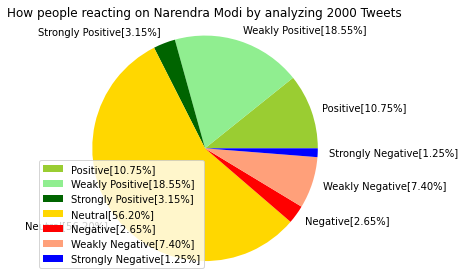

In [20]:
plt.pie(sizes, labels=labels, colors =colors)
plt.legend(labels, loc='best')
plt.title('How people reacting on ' + searchterm + ' by analyzing ' + str(No_of_Terms)+ ' Tweets')
plt.axis('equal')
plt.tight_layout()
plt.show()